# Satyaki NBPB 

## Approach 1: Using NBPB Code

#### PYTHON 2

In [1]:
import pandas as pd
import numpy as np
import datetime
import sqlite3

In [2]:
# Parameters

# 5 mins interval
Polling = 5

In [3]:
conn = sqlite3.connect('Data/ticket_db.sqlite')
cur = conn.cursor()

In [4]:
d1 = pd.read_sql("select name from sqlite_master where type = 'table'", con=conn)
d1
#d1 = pd.read_sql("SELECT 'vdevice_host_name' as HOSTNAME FROM ticket_data", con=conn)

,name
0,sqlite_sequence
1,ticket_data


In [7]:
#d1 = pd.read_sql("select * from ticket_data", con=conn)

In [8]:
#d1.to_csv('ticket_db.csv')

In [5]:
data = pd.read_sql("SELECT 'vdevice-host-name' as Hostname, application as Application, octets, strftime('%Y-%m-%d %H:%M:%S', datetime(scheduler_datetime,'unixepoch')) as Timestamp FROM ticket_data", con=conn)

In [6]:
data.shape

(601151, 4)

## Raw Data

In [7]:
df = data.copy()
# Continous data starts here
df = df[34:]

# convert octects into bps
df['octets(kb)'] = df['octets'].astype(float)/(8*1000)

In [8]:
df.head()

,Hostname,Application,octets,Timestamp,octets(kb)
34,vdevice-host-name,dns,999321,2019-01-18 08:50:12,124.915125
35,vdevice-host-name,firefox_update,135582,2019-01-18 08:50:12,16.947750
36,vdevice-host-name,google_gen,999692,2019-01-18 08:50:12,124.961500
37,vdevice-host-name,https,14039837,2019-01-18 08:50:12,1754.979625
38,vdevice-host-name,mozilla,961326,2019-01-18 08:50:12,120.165750


In [9]:
df['octets(kb)']=df['octets(kb)'].round(2)

In [10]:
df.head()

,Hostname,Application,octets,Timestamp,octets(kb)
34,vdevice-host-name,dns,999321,2019-01-18 08:50:12,124.92
35,vdevice-host-name,firefox_update,135582,2019-01-18 08:50:12,16.95
36,vdevice-host-name,google_gen,999692,2019-01-18 08:50:12,124.96
37,vdevice-host-name,https,14039837,2019-01-18 08:50:12,1754.98
38,vdevice-host-name,mozilla,961326,2019-01-18 08:50:12,120.17


In [11]:
df.to_csv('understanding.csv', index=False)

In [12]:


# convert to datetime and round-off min
df.Timestamp = pd.to_datetime(pd.to_datetime(df.Timestamp).dt.strftime('%Y-%m-%d %H:%M:00'))
df = df.sort_values(by='Timestamp').reset_index(drop=True)
df.head()

,Hostname,Application,octets,Timestamp,octets(kb)
0,vdevice-host-name,dns,999321,2019-01-18 08:50:00,124.92
1,vdevice-host-name,unknown,6263,2019-01-18 08:50:00,0.78
2,vdevice-host-name,tcp,256,2019-01-18 08:50:00,0.03
3,vdevice-host-name,mozilla,961326,2019-01-18 08:50:00,120.17
4,vdevice-host-name,https,14039837,2019-01-18 08:50:00,1754.98


## Final Data

In [17]:
final = pd.DataFrame()

for app in df.Application.unique():
    
    f = df[df.Application == app].sort_values(by='Timestamp').reset_index(drop=True)
    f = f.drop_duplicates(subset='Timestamp')
    #print(f.Timestamp)
    f['time_gap(seconds)'] = (f.Timestamp.subtract(f.Timestamp.shift(1)) ).fillna(0).apply(lambda x: int(x.total_seconds()))
    f['Utilization(kb)'] = (f['octets(kb)'] - f['octets(kb)'].shift(1)).fillna(0)
    f = f.reset_index(drop=True)
    f = f[f['time_gap(seconds)'] == Polling*60]
    final = final.append(f)

In [18]:
final = final.sort_values(by='Timestamp').reset_index(drop=True)
final.head()

,Hostname,Application,octets,Timestamp,octets(kb),time_gap(seconds),Utilization(kb)
0,vdevice-host-name,dns,1000161,2019-01-18 08:55:00,125.02,300,0.10
1,vdevice-host-name,tcp,256,2019-01-18 08:55:00,0.03,300,0.00
2,vdevice-host-name,https,14062056,2019-01-18 08:55:00,1757.76,300,2.78
3,vdevice-host-name,google_gen,999692,2019-01-18 08:55:00,124.96,300,0.00
4,vdevice-host-name,firefox_update,135582,2019-01-18 08:55:00,16.95,300,0.00


## Final Output

In [19]:
final = final[['Hostname', 'Application', 'Utilization(kb)', 'Timestamp']]

In [20]:
final.to_csv('Data/preprocessed_data.csv')

In [12]:
application = final['Application']

In [13]:
applist = np.unique(application).tolist()

In [14]:
len(applist)

60

In [21]:
(176/178)*100.

98.87640449438202

In [24]:
space = '             '

In [29]:
for i in range(len(applist)):
    df = final[final['Application'] == applist[i]]
    df = pd.DataFrame(df['Utilization(bps)'])
    nz = df.shape[0] - np.count_nonzero(df)
    zPercent = (nz/df.shape[0])*100.
#     table = [applist[i], df.shape[0], np.count_nonzero(df), zPercent]
    print(np.count_nonzero(df))
    del df

6
28
7
18
36
0
1
2
20
7
20
1
1
21251
24
533
112
5
3692
18
4375
27
834
0
30
21229
0
0
26
1
10
15
31
1
2605
14257
3
10
181
26
30
36
0
0
0
14277
23
0
30
3
599
27
0
2
10646
23
21
22
2967
1


In [27]:
table = pd.DataFrame(table)

In [28]:
table

,0
0,zedo
1,1483
2,1
3,99.9326


In [26]:
df = final[final['Application'] == 'dns']
df = pd.DataFrame(df['Utilization(bps)'])
nz = df.shape[0] - np.count_nonzero(df)
(nz/df.shape[0])*100.

0.024795437639474338

In [27]:
df

,Utilization(bps)
0,105.000
9,212.500
20,105.000
21,340.000
34,142.500
36,157.500
43,521.625
53,163.250
57,154.250
63,398.500


In [30]:
from matplotlib.pyplot import plot 

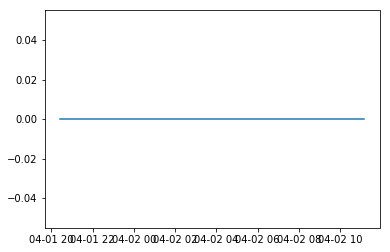

In [31]:
df = final[final['Application'] == 'amazon_aws']
time = df['Timestamp']
util = df['Utilization(bps)']
plot(time, util)

In [ ]:
df = final[final['Application'] == 'https']
time = df['Timestamp']
util = df['Utilization(bps)']
plot(time, util)

In [ ]:
df = final[final['Application'] == 'new_relic']
time = df['Timestamp']
util = df['Utilization(bps)']
plot(time, util)

In [ ]:
df = final[final['Application'] == 'salesforce']
time = df['Timestamp']
util = df['Utilization(bps)']
plot(time, util)

In [ ]:
df = final[final['Application'] == 'unknown']
time = df['Timestamp']
util = df['Utilization(bps)']
plot(time, util)

In [ ]:
df = final[final['Application'] == 'adobe']
time = df['Timestamp']
util = df['Utilization(bps)']
plot(time, util)

In [ ]:
df = final[final['Application'] == 'appnexus']
time = df['Timestamp']
util = df['Utilization(bps)']
plot(time, util)

In [32]:
n=1
for i in range(n):
    n=1


In [ ]:
while True:
    a=1